In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Load Data

In [4]:
data=pd.read_excel("C:/Users/Ankur Mishra/OneDrive/Desktop/Python_Project/laptop_price.xlsx")
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Sales
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,133
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.0,256
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,367.0,122
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,682.0,227
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,841.0,280


In [5]:
data.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Sales
1168,780,Samsung,Notebook 9,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,AMD Radeon 540,Windows 10,1.71kg,1799.0,599
1169,821,Samsung,Notebook 9,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.81kg,1499.0,499
1170,885,Samsung,Notebook 9,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.23kg,1849.0,616
1171,903,Samsung,Notebook 9,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.17kg,1699.0,566
1172,1209,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0,219


Converting Ram,Weight to integer value for better analysis

In [7]:
data['Ram'] = data['Ram'].astype(str).str.replace('GB', '').astype(int)
data['Weight']=data['Weight'].astype(str).str.replace('kg', '').astype(float)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Sales
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1,400.0,133
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6,770.0,256
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Linux,2.1,367.0,122
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2,682.0,227
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2,841.0,280


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1173 non-null   int64  
 1   Company           1173 non-null   object 
 2   Product           1173 non-null   object 
 3   TypeName          1173 non-null   object 
 4   Inches            1173 non-null   float64
 5   ScreenResolution  1173 non-null   object 
 6   Cpu               1173 non-null   object 
 7   Ram               1173 non-null   int64  
 8   Memory            1173 non-null   object 
 9   Gpu               1173 non-null   object 
 10  OpSys             1173 non-null   object 
 11  Weight            1173 non-null   float64
 12  Price_euros       1173 non-null   float64
 13  Sales             1173 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 128.4+ KB


In [9]:
data.describe()

,laptop_ID,Inches,Ram,Weight,Price_euros,Sales
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,653.491901,14.996846,8.143223,2.033811,1087.746522,362.202899
std,385.079885,1.413591,4.906632,0.653417,667.468211,222.495354
min,1.000000,10.100000,2.000000,0.690000,174.000000,58.000000
25%,320.000000,14.000000,4.000000,1.500000,589.000000,196.000000
50%,645.000000,15.600000,8.000000,2.040000,928.000000,309.000000
75%,989.000000,15.600000,8.000000,2.300000,1419.000000,473.000000
max,1320.000000,17.300000,64.000000,4.700000,4899.000000,1633.000000


In [10]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
Sales               0
dtype: int64

See Duplicate Values

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1173 non-null   int64  
 1   Company           1173 non-null   object 
 2   Product           1173 non-null   object 
 3   TypeName          1173 non-null   object 
 4   Inches            1173 non-null   float64
 5   ScreenResolution  1173 non-null   object 
 6   Cpu               1173 non-null   object 
 7   Ram               1173 non-null   int64  
 8   Memory            1173 non-null   object 
 9   Gpu               1173 non-null   object 
 10  OpSys             1173 non-null   object 
 11  Weight            1173 non-null   float64
 12  Price_euros       1173 non-null   float64
 13  Sales             1173 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 128.4+ KB


To check datatype

In [13]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price_euros         float64
Sales                 int64
dtype: object

1) Average Laptop price of each brand

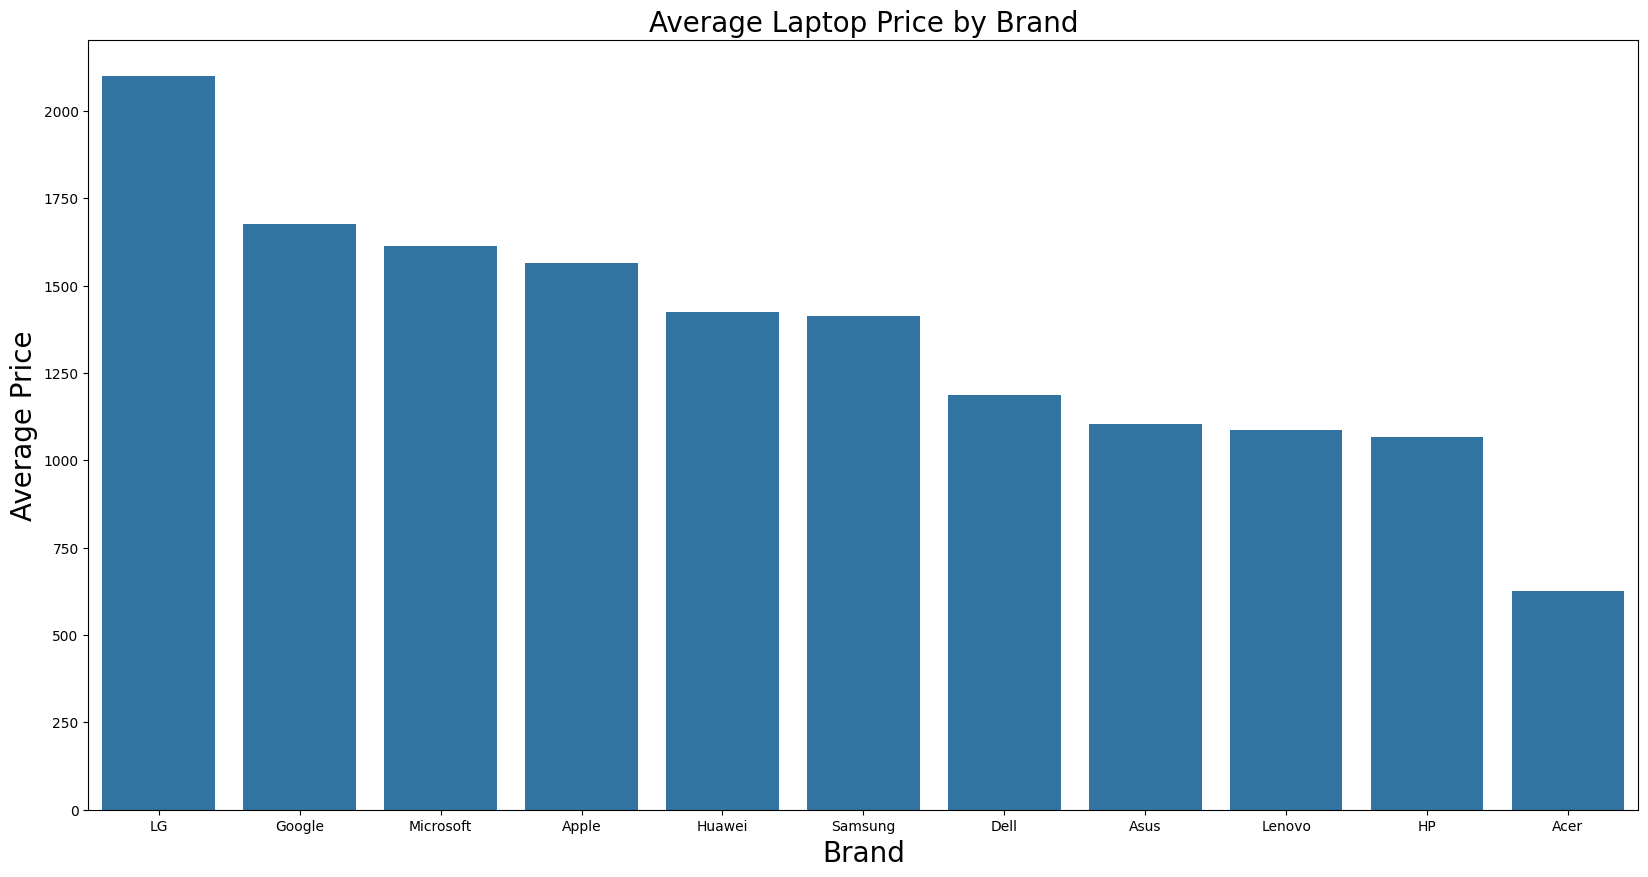

In [17]:

brand_price=data.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x=brand_price.index,y=brand_price.values)
plt.title('Average Laptop Price by Brand',fontsize=20)
plt.xlabel('Brand',fontsize=20)
plt.ylabel('Average Price',fontsize=20)
plt.show()

Conclusion: Here I have concluded that Average price of Laptop of LG company is greater than any other laptop company.We can also say that sale of LG laptop is greater than any other laptop.

2. How price is increasing with increase the capacity of RAM.

Text(0, 0.5, 'Average Price')

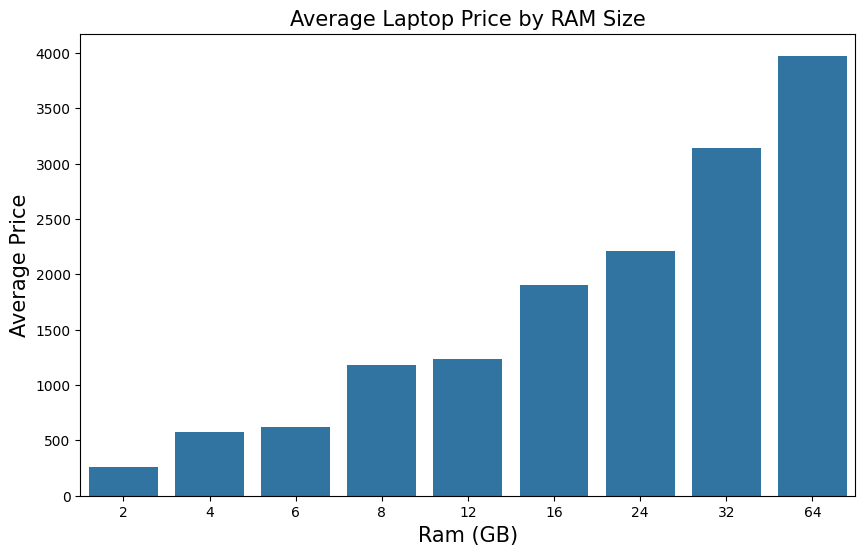

In [18]:
ram_price=data.groupby('Ram')['Price_euros'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=ram_price.index,y=ram_price.values)
plt.title('Average Laptop Price by RAM Size',fontsize=15)
plt.xlabel('Ram (GB)',fontsize=15)
plt.ylabel('Average Price',fontsize=15)


Conclusion: According to upper graph we can say that price is decreasing with the decrease in capacity of memory storage.

3. Increase in price with increase in the size of screeen

Text(0, 0.5, 'Average Price')

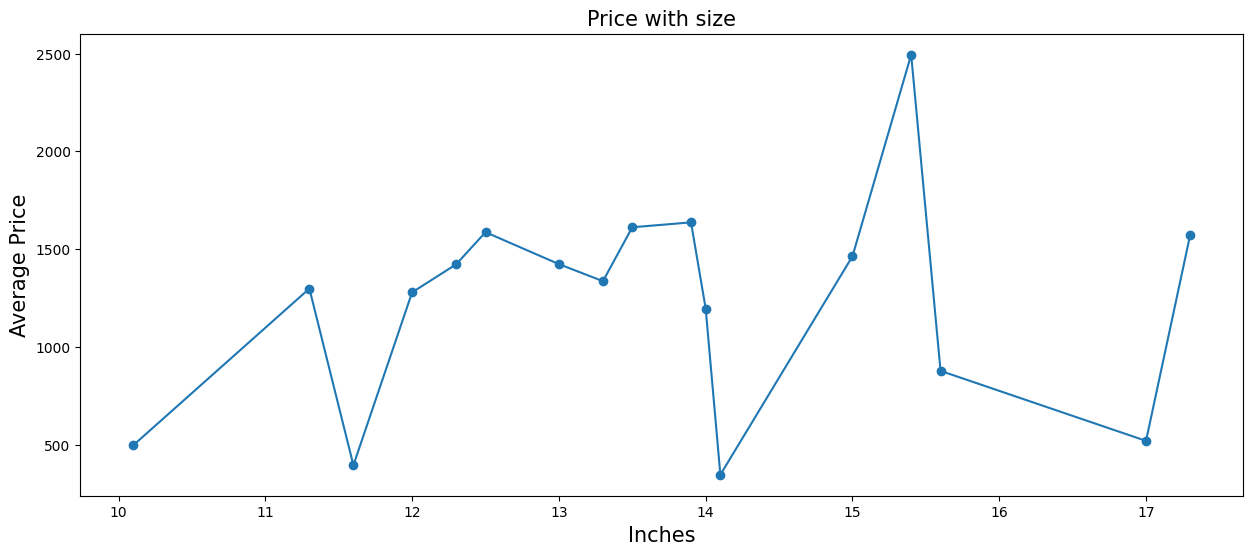

In [19]:
inch_price=data.groupby('Inches')['Price_euros'].mean()
inch_price.plot(kind='line',figsize=(15,6),marker='o')
plt.title('Price with size',fontsize=15)
plt.xlabel('Inches',fontsize=15)
plt.ylabel('Average Price',fontsize=15)

Conclusion: According to upper graph in some cases price is increasing with increase in size and in some cases price is increasing with decrease in size. It means price is not highly dependent on screen size

4. Correlation between INches,Ram,Weight,Price_euros

Text(0.5, 1.0, 'Correlation')

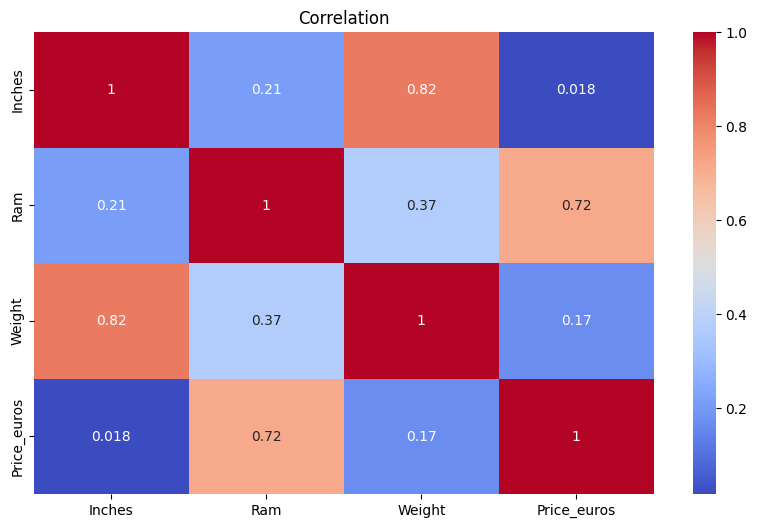

In [24]:
corr=data[['Inches','Ram','Weight','Price_euros',]].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation')

Conclusion: According to heatmap weight and inches are highly correlated with each other,So if size will increase weight will also increase with that.

5. How weight and size increasing with respect to each other

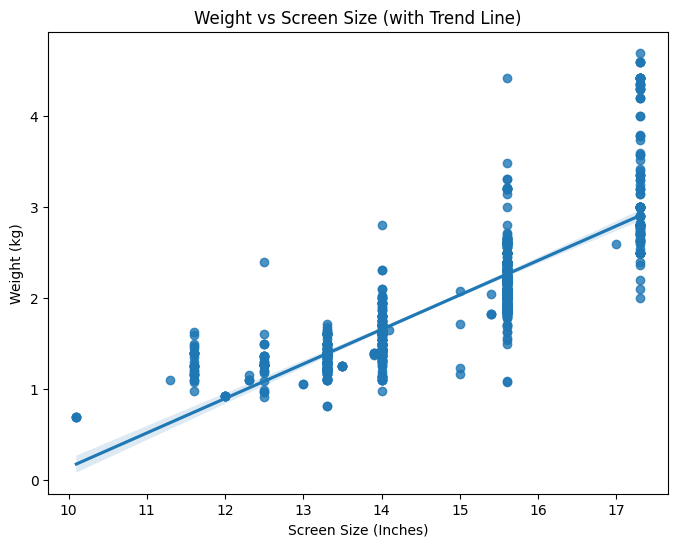

In [20]:
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='Inches', y='Weight')
plt.title('Weight vs Screen Size (with Trend Line)')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Weight (kg)')
plt.show()

Conclusion: According to upper graph weight is increasing with increase in screen size.

6.Top five companies with highest sale

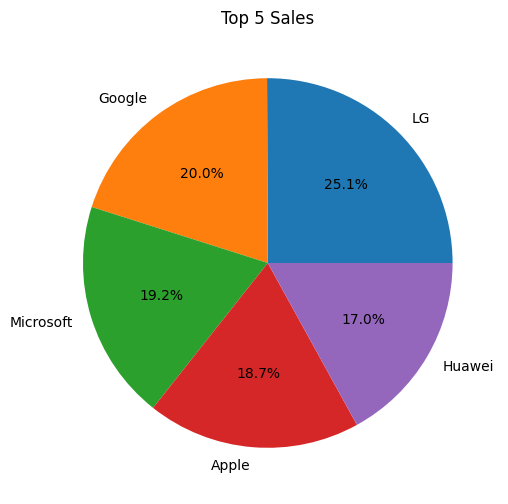

In [21]:
brand_price=data.groupby('Company')['Sales'].mean().sort_values(ascending=False).head()
brand_price.plot(kind='pie',figsize=(15,6),autopct='%1.1f%%')
plt.title('Top 5 Sales')
plt.ylabel('')
plt.show()

conclusion: LG company makes the highest sales,Google meke the second highest sale and Microsoft make third highest sale.

7. Sales of all companies

<Axes: xlabel='Company'>

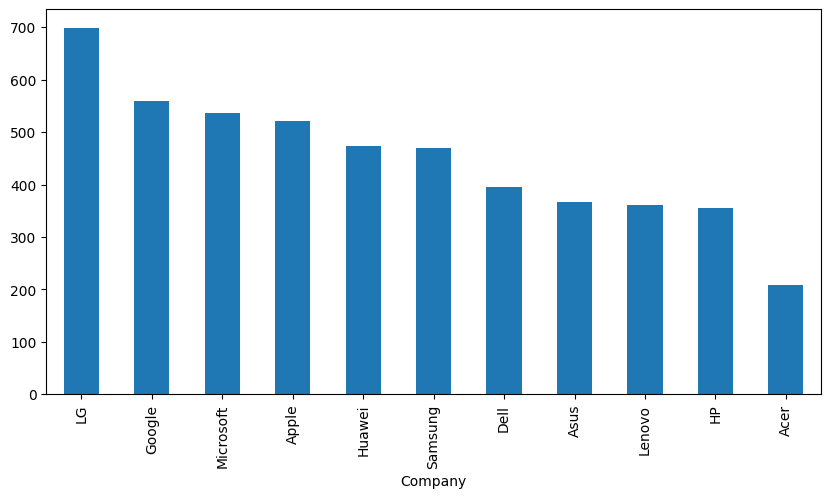

In [ ]:
price_sales=data.groupby('Company')['Sales'].mean().sort_values(ascending=False)
price_sales.plot(kind='bar',figsize=(10,5))
plt.title()

Conclusion: LG make the highest sales and Acer make the lowest sale so Acer need to improve there features to increase there sales.

8.Type name popularity and pricing

Text(0, 0.5, 'Average price')

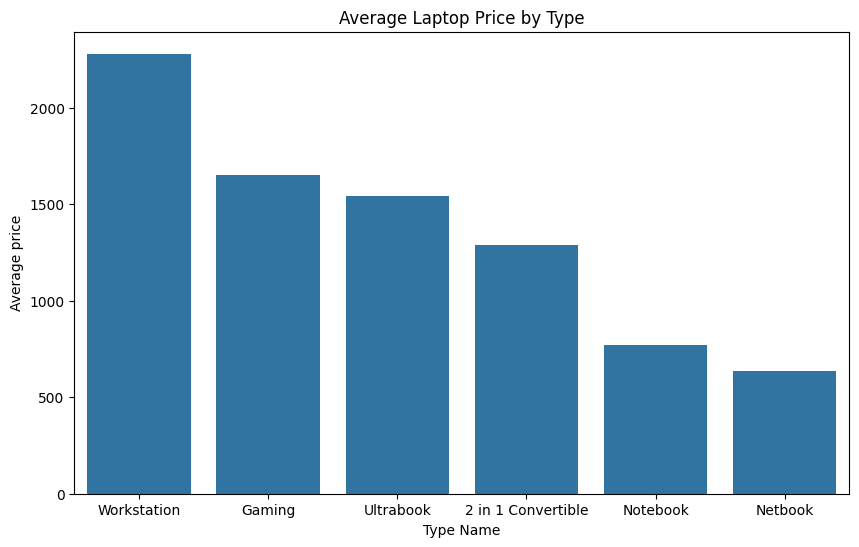

In [9]:
type_price=data.groupby('TypeName')['Price_euros'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=type_price.index,y=type_price.values)
plt.title('Average Laptop Price by Type')
plt.xlabel('Type Name')
plt.ylabel('Average price')


Conclusion:According to upper graph average price of Workstation type laptop is greater and Netbook laptop is lesser than any other laptop.

9.Operating system distribution